In [1]:
import pandas as pd

from portfawn.market_data import MarketData
from portfawn.portfolio import Portfolio

%matplotlib inline

In [2]:
## Parameters
# market data
tickers = {"Global REIT": "REET", 
           "MSCI Emerging Markets": "EEM", 
           "Core S&P Total U.S. Stock Market": "ITOT",
           'Core U.S. Aggregate Bond': 'AGG'}

# date
start_date = "2015-01-01"
end_date   = "2020-12-30"

# portfolio
portfolio_fitness = "Equal"
risk_free_rate = 0.00
sampling_params = {"type": "standard"}
optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.05,
    "target_risk": 0.05,
    "weight_bound": (0.05, 0.95),
}

In [3]:
## Create the market instance
market_data = MarketData(
    tickers = tickers,
    date_start = start_date,
    date_end = end_date,
    col_price = "Close",
)
data_returns = market_data.data_returns

In [4]:
portfolio = Portfolio(
        portfolio_fitness=portfolio_fitness,
        data_returns=data_returns,
        risk_free_rate=risk_free_rate,
        optimization_params=optimization_params,
        sampling_params=sampling_params,
    )
portfolio.optimize()
portfolio.evaluate()

## Portfolio Returns

In [5]:
portfolio.performance['portfolio_returns'].head(3)

,Equal
Date,
2015-01-05,-0.007282
2015-01-06,-0.001077
2015-01-07,0.011970


In [6]:
portfolio.performance['portfolio_assets_returns'].head(3)

,Equal,Global REIT,MSCI Emerging Markets,Core S&P Total U.S. Stock Market,Core U.S. Aggregate Bond
Date,,,,,
2015-01-05,-0.007282,0.004403,-0.017797,-0.017909,0.002174
2015-01-06,-0.001077,0.006481,-0.004202,-0.009117,0.002530
2015-01-07,0.011970,0.015151,0.021625,0.011282,-0.000180


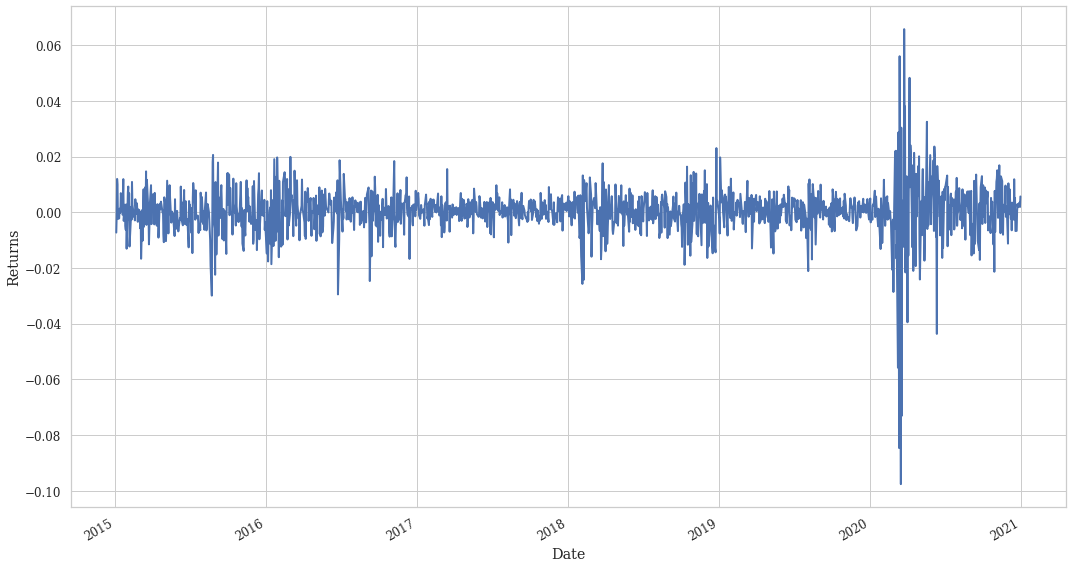

In [7]:
fig, ax = portfolio.plot_returns()

## Portfolio cumulative Returns

In [8]:
portfolio.performance['portfolio_cum_returns'].head(3)

,Equal
Date,
2015-01-05,-0.007282
2015-01-06,-0.008351
2015-01-07,0.003518


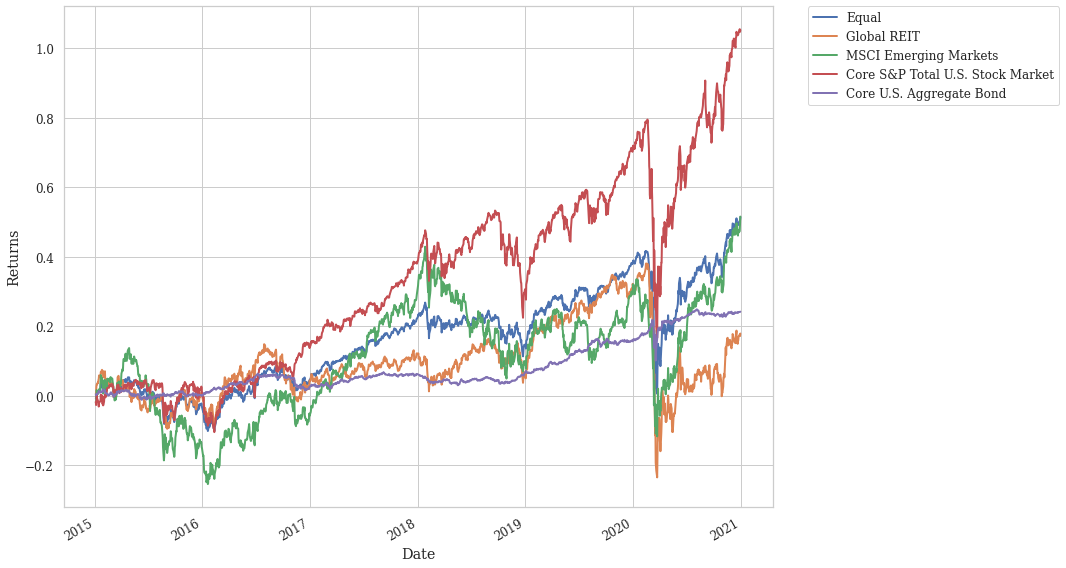

In [9]:
fig, ax = portfolio.plot_cum_returns()

## Distributions of Portfolio Returns

In [10]:
portfolio.performance['portfolio_assets_returns'].describe()

,Equal,Global REIT,MSCI Emerging Markets,Core S&P Total U.S. Stock Market,Core U.S. Aggregate Bond
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,0.000314,0.000189,0.000373,0.000546,0.000148
std,0.008739,0.012496,0.013901,0.011714,0.002804
min,-0.097599,-0.166591,-0.124793,-0.115728,-0.040011
25%,-0.003195,-0.004527,-0.006828,-0.003306,-0.001049
50%,0.000616,0.000733,0.000961,0.000600,0.000188
75%,0.004183,0.005642,0.008103,0.005594,0.001416
max,0.065753,0.087609,0.075139,0.092007,0.023721


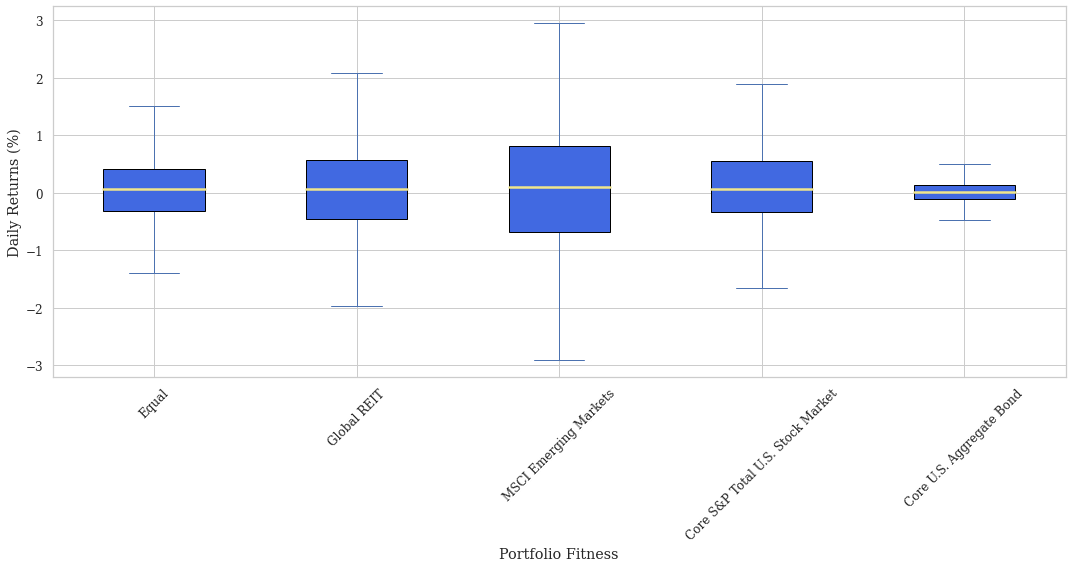

In [11]:
fig, ax = portfolio.plot_dist_returns()

## Relationships of Returns

In [12]:
# Cov Data
portfolio.performance['portfolio_assets_returns'].cov()

,Equal,Global REIT,MSCI Emerging Markets,Core S&P Total U.S. Stock Market,Core U.S. Aggregate Bond
Equal,0.000076,0.000097,0.000110,9.498649e-05,4.020180e-06
Global REIT,0.000097,0.000156,0.000113,1.117000e-04,6.725331e-06
MSCI Emerging Markets,0.000110,0.000113,0.000193,1.312184e-04,1.682534e-06
Core S&P Total U.S. Stock Market,0.000095,0.000112,0.000131,1.372175e-04,-1.899497e-07
Core U.S. Aggregate Bond,0.000004,0.000007,0.000002,-1.899497e-07,7.862802e-06


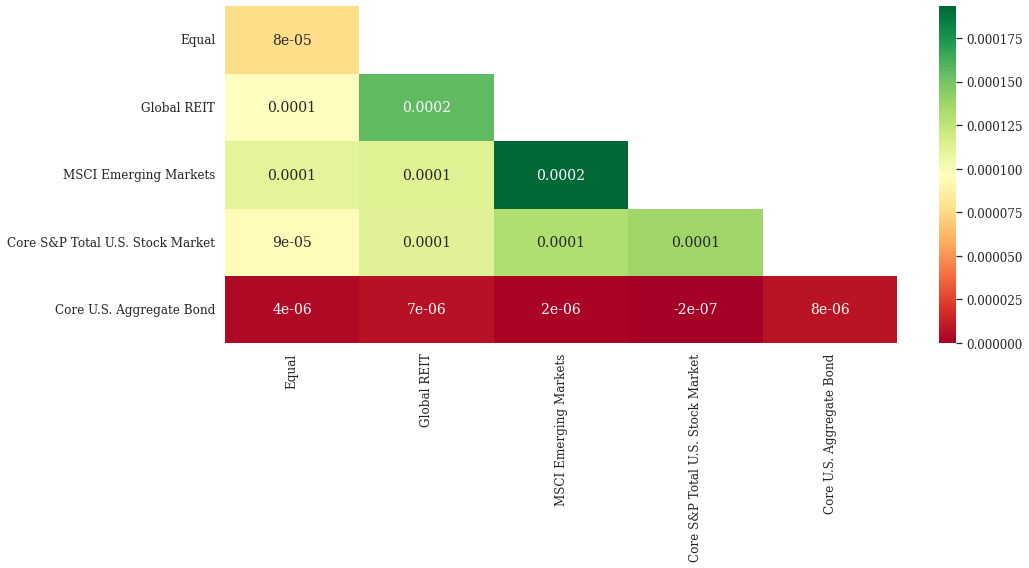

In [13]:
# Cov plot
fig, ax = portfolio.plot_cov()

In [14]:
# Corr Data
portfolio.performance['portfolio_assets_returns'].corr()

,Equal,Global REIT,MSCI Emerging Markets,Core S&P Total U.S. Stock Market,Core U.S. Aggregate Bond
Equal,1.000000,0.886425,0.902943,0.927865,0.164053
Global REIT,0.886425,1.000000,0.648438,0.763116,0.191941
MSCI Emerging Markets,0.902943,0.648438,1.000000,0.805859,0.043166
Core S&P Total U.S. Stock Market,0.927865,0.763116,0.805859,1.000000,-0.005783
Core U.S. Aggregate Bond,0.164053,0.191941,0.043166,-0.005783,1.000000


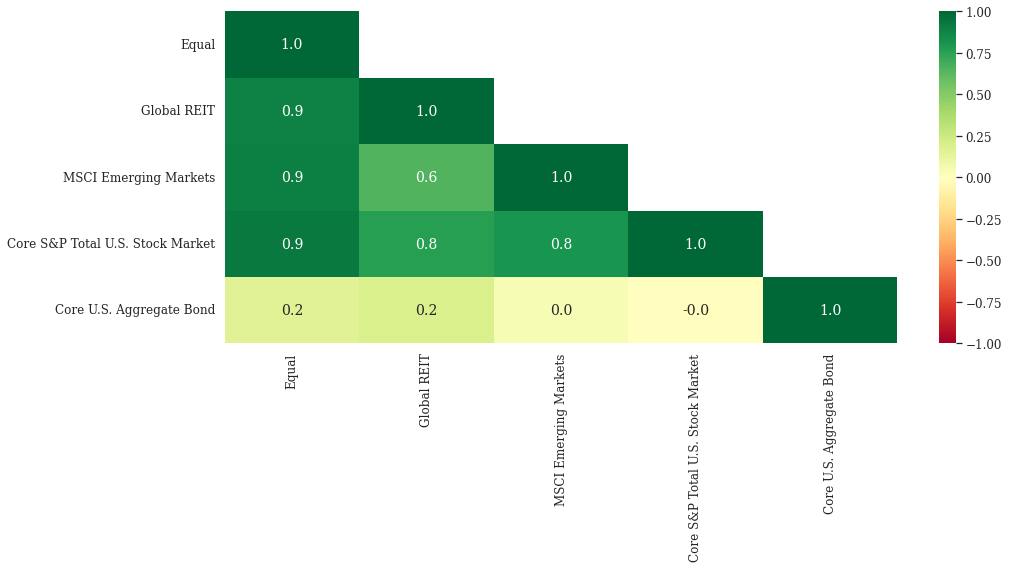

In [15]:
# Corr plot
fig, ax = portfolio.plot_corr()

## Expected Returns vs. Volatility

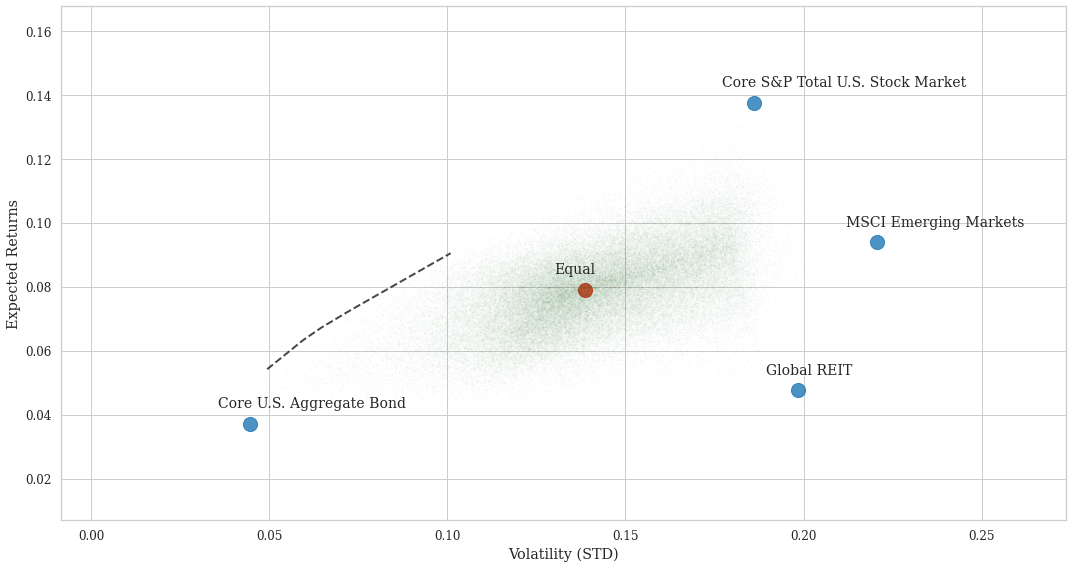

In [16]:
fig, ax = portfolio.plot_mean_std()